In [1]:
import pandas as pd # python에서의 엑셀과 같은 역할
import numpy as np # 계산을 편하게 해 주는 라이브러리
import matplotlib.pyplot as plt # 시각화
import seaborn as sns # 시각화

import matplotlib.ticker as ticker # 시각화
import matplotlib.dates as mdates # 시각화


#결과창의 warning을 ignore 해주는 코드 (버전 업 등)
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 한글폰트 적용
import matplotlib.font_manager as fm
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

plt.rcParams['font.family'] = 'NanumBarunGothic'

- google drive mount
from google.colab import drive
drive.mount('/content/drive')

# _01. 데이터 로드

In [3]:
df = pd.read_csv('df_seat.csv')
df_seat = df.copy()
df_seat.head()

,user_key,sales_key,branch,sales_type,items,term,paid_by,paid_date,start_date,end_date,...,paid_month,start_month,end_month,start_day,next_start_date,user_lead_1,user_check,elapsed_days,item_seg,item_seg_np
0,1,1067235,01호,매출,자유석,1,카드,2021-04-11,2021-04-11,2021-05-10,...,4,4,5,Sunday,2021-04-03,2,-1,NaN,자유,자유
1,2,1055317,01호,매출,싱글석,3,카드,2021-03-28,2021-04-03,2021-07-02,...,3,4,7,Saturday,2021-07-03,2,0,0.0,고정,고정
2,2,1136132,01호,매출,싱글석,2,카드,2021-06-27,2021-07-03,2021-08-31,...,6,7,8,Saturday,2021-09-01,2,0,0.0,고정,고정
3,2,1210305,01호,매출,싱글석,1,카드,2021-08-31,2021-09-01,2021-09-30,...,8,9,9,Wednesday,2021-10-01,2,0,0.0,고정,고정
4,2,1239778,01호,매출,싱글석,1,카드,2021-09-30,2021-10-01,2021-10-30,...,9,10,10,Friday,2021-06-19,3,-1,NaN,고정,고정


## 1.1. 데이터 spec 파악

In [4]:
df_seat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71293 entries, 0 to 71292
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_key            71293 non-null  int64  
 1   sales_key           71293 non-null  int64  
 2   branch              71293 non-null  object 
 3   sales_type          71293 non-null  object 
 4   items               71293 non-null  object 
 5   term                71293 non-null  int64  
 6   paid_by             71293 non-null  object 
 7   paid_date           71293 non-null  object 
 8   start_date          71293 non-null  object 
 9   end_date            71293 non-null  object 
 10  payment_type        71293 non-null  object 
 11  discount            71293 non-null  int64  
 12  paid_amount         71293 non-null  int64  
 13  avg_paid_amount_1   71293 non-null  float64
 14  avg_paid_amount     61454 non-null  float64
 15  avg_paid_amount_np  61454 non-null  float64
 16  paid

## 1.2. Cohort에 필요한 컬럼만 가져오기

In [6]:
df_base = df_seat[['user_key', 'branch', 'sales_type', 'items', 'paid_date', 'item_seg']] # 가장 중요한 변수 : user_key & paid_date
df_base.head()

,user_key,branch,sales_type,items,paid_date,item_seg
0,1,01호,매출,자유석,2021-04-11,자유
1,2,01호,매출,싱글석,2021-03-28,고정
2,2,01호,매출,싱글석,2021-06-27,고정
3,2,01호,매출,싱글석,2021-08-31,고정
4,2,01호,매출,싱글석,2021-09-30,고정


# _02. data cleansing

## 2.1. 매출만 남기기
- 결제 일어난 것 자체가 중요하다는 전제하에 매출만 가지고 분석

In [7]:
df_base['sales_type'].unique().tolist()

['매출', '매출취소']

In [8]:
#df_base['sales_type'] == '매출' # true, false 
df_base = df_base[df_base['sales_type'] == '매출'] 
df_base.info()

# 데이터 개수 : 71293 -> 63104 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63104 entries, 0 to 71292
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_key    63104 non-null  int64 
 1   branch      63104 non-null  object
 2   sales_type  63104 non-null  object
 3   items       63104 non-null  object
 4   paid_date   63104 non-null  object
 5   item_seg    63104 non-null  object
dtypes: int64(1), object(5)
memory usage: 3.4+ MB


## 2.2. data type 맞추기

In [9]:
# datetime으로 type 변환하기

# df_base['paid_date'] = df_base['paid_date'].astype('datetime64[ns]') # pandas 이용x
df_base['paid_date'] = pd.to_datetime(df_base['paid_date'], format = '%Y-%m-%d') # pandas 이용
df_base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63104 entries, 0 to 71292
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_key    63104 non-null  int64         
 1   branch      63104 non-null  object        
 2   sales_type  63104 non-null  object        
 3   items       63104 non-null  object        
 4   paid_date   63104 non-null  datetime64[ns]
 5   item_seg    63104 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 3.4+ MB


In [10]:
df_base.head(2)

,user_key,branch,sales_type,items,paid_date,item_seg
0,1,01호,매출,자유석,2021-04-11,자유
1,2,01호,매출,싱글석,2021-03-28,고정


# _03. 분석하기 좋은 data로 만들기

## 3.1. 최초 구매일 컬럼 생성

In [14]:
df_base['first_paid'] = df_base.groupby(['user_key'])['paid_date'].transform('min')
#userkey 중심으로 groupby 하고, paid_date를 'min'으로 가져오되
#가져온 컬럼을 first_paid 인덱스로 컬럼을 생성
df_base.head(10)

,user_key,branch,sales_type,items,paid_date,item_seg,first_paid
0,1,01호,매출,자유석,2021-04-11,자유,2021-04-11
1,2,01호,매출,싱글석,2021-03-28,고정,2021-03-28
2,2,01호,매출,싱글석,2021-06-27,고정,2021-03-28
3,2,01호,매출,싱글석,2021-08-31,고정,2021-03-28
4,2,01호,매출,싱글석,2021-09-30,고정,2021-03-28
5,3,01호,매출,셀석,2021-06-18,자유,2021-06-18
6,3,01호,매출,셀석,2021-06-20,자유,2021-06-18
8,4,01호,매출,자유석,2021-06-29,자유,2021-06-29
9,5,01호,매출,1day,2021-04-16,단기,2021-04-16
10,5,01호,매출,자유석,2021-04-17,자유,2021-04-16


In [15]:
# user_key 2번 예시
df_base[df_base['user_key'] ==2]

,user_key,branch,sales_type,items,paid_date,item_seg,first_paid
1,2,01호,매출,싱글석,2021-03-28,고정,2021-03-28
2,2,01호,매출,싱글석,2021-06-27,고정,2021-03-28
3,2,01호,매출,싱글석,2021-08-31,고정,2021-03-28
4,2,01호,매출,싱글석,2021-09-30,고정,2021-03-28


## 3.2. 월 단위 형태로 data 맞추기

In [16]:
#월 단위
df_base['first_ym'] = df_base['first_paid'].dt.strftime('%Y-%m') # yyyy-mm 형태로 변환
df_base['paid_ym'] = df_base['paid_date'].dt.strftime('%Y-%m') # yyyy-mm 형태로 변환
df_base.head()

,user_key,branch,sales_type,items,paid_date,item_seg,first_paid,first_ym,paid_ym
0,1,01호,매출,자유석,2021-04-11,자유,2021-04-11,2021-04,2021-04
1,2,01호,매출,싱글석,2021-03-28,고정,2021-03-28,2021-03,2021-03
2,2,01호,매출,싱글석,2021-06-27,고정,2021-03-28,2021-03,2021-06
3,2,01호,매출,싱글석,2021-08-31,고정,2021-03-28,2021-03,2021-08
4,2,01호,매출,싱글석,2021-09-30,고정,2021-03-28,2021-03,2021-09


### 3.2.1 data range 확인

In [17]:
df_base['paid_ym'].nunique()
# 2021년은 12개월로 이루어져있는데, 13개월로 표시됨 -> 1달이 더 있음을 의미

13

In [18]:
print(df_base['paid_ym'].min())
print(df_base['paid_ym'].max())

2021-01
2022-01


In [19]:
#각 월당 유저 수 확인
df_base.groupby(['paid_ym']).agg(count =('user_key','nunique')).reset_index()

,paid_ym,count
0,2021-01,3781
1,2021-02,3701
2,2021-03,4217
3,2021-04,3625
4,2021-05,3817
5,2021-06,4569
6,2021-07,5589
7,2021-08,4290
8,2021-09,4445
9,2021-10,4334


In [20]:
# 22년 1월에는 22명만 있으니, 21년 12월 데이터로 편입시켜도 괜찮다고 결정
# replace 함수 이용

df_base['paid_ym'] = df_base['paid_ym'].replace('2022-01', '2021-12')
df_base['first_ym'] = df_base['first_ym'].replace('2022-01', '2021-12')

In [21]:
print(df_base['paid_ym'].min())
print(df_base['paid_ym'].max())

2021-01
2021-12


In [23]:
print(df_base['first_ym'].min())
print(df_base['first_ym'].max())

2021-01
2021-12


In [24]:
df_base.head()

,user_key,branch,sales_type,items,paid_date,item_seg,first_paid,first_ym,paid_ym
0,1,01호,매출,자유석,2021-04-11,자유,2021-04-11,2021-04,2021-04
1,2,01호,매출,싱글석,2021-03-28,고정,2021-03-28,2021-03,2021-03
2,2,01호,매출,싱글석,2021-06-27,고정,2021-03-28,2021-03,2021-06
3,2,01호,매출,싱글석,2021-08-31,고정,2021-03-28,2021-03,2021-08
4,2,01호,매출,싱글석,2021-09-30,고정,2021-03-28,2021-03,2021-09


## 3.3. 매 월 단위 동질 집단 리텐션 숫자 생성

In [26]:
df_user_cnts = df_base.groupby(['first_ym', 'paid_ym'])['user_key'].agg('nunique').reset_index() # 최초구매시기, 구매발생시기 를 집계하되, user_key 중심으로 groupby
df_user_cnts = df_user_cnts.rename(columns = {'user_key':'user_cnts'})
df_user_cnts

## 2021-01에 최초 구매하고 결제한 유저 = 3781
## 2021-01에 최초 구매하고, 02월에도 구매한 유저 = 1805

,first_ym,paid_ym,user_cnts
0,2021-01,2021-01,3781
1,2021-01,2021-02,1805
2,2021-01,2021-03,1381
3,2021-01,2021-04,963
4,2021-01,2021-05,899
...,...,...,...
73,2021-10,2021-11,318
74,2021-10,2021-12,120
75,2021-11,2021-11,840
76,2021-11,2021-12,263


### 3.3.1. 매 월 데이터가 있는 지 확인 해 보기

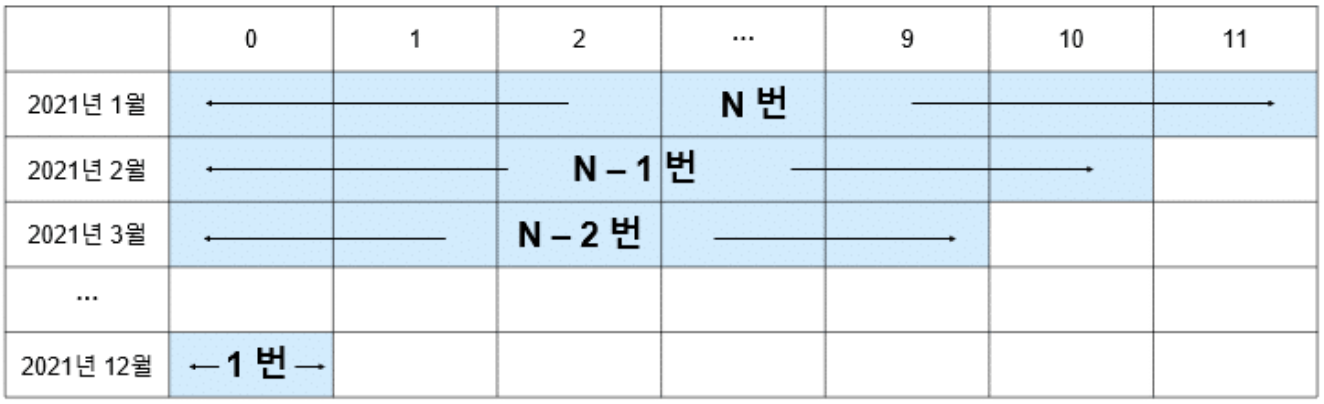

* 현재 데이터는 1년 12달에 대한 cohort를 보기 위한 것 이므로,
    * 12 + 11 + 10 + ... + 3 + 2 + 1 = 총 row 개수 78과 맞는 지 확인 해 보면 된다
    * ( 12 + 1 ) + ( 11 + 2 ) + ... + ( 7 + 6 ) = 13 x 6 = 78
    * 즉, 12월에 12개, 11월에 11개 .....

In [27]:
# 실제로 월마다 모든 cohort 개수가 있는 지 확인
df_user_cnts['first_ym'].value_counts()

2021-01    12
2021-02    11
2021-03    10
2021-04     9
2021-05     8
2021-06     7
2021-07     6
2021-08     5
2021-09     4
2021-10     3
2021-11     2
2021-12     1
Name: first_ym, dtype: int64

### 3.3.2. Cohort 기간 컬럼 생성

In [28]:
# 실제로 월마다 모든 cohort 개수가 있는 지 확인되었으므로, Cohort 기간 컬럼 생성
# cumcount : 누적count
# 파이썬은 0부터 count 하기때문에 +1 해줌

df_user_cnts['cohort_period'] = df_user_cnts.groupby(['first_ym']).cumcount()+1
df_user_cnts.head(10)

,first_ym,paid_ym,user_cnts,cohort_period
0,2021-01,2021-01,3781,1
1,2021-01,2021-02,1805,2
2,2021-01,2021-03,1381,3
3,2021-01,2021-04,963,4
4,2021-01,2021-05,899,5
5,2021-01,2021-06,879,6
6,2021-01,2021-07,949,7
7,2021-01,2021-08,784,8
8,2021-01,2021-09,756,9
9,2021-01,2021-10,747,10


In [29]:
# 예시 
#: first_ym (2010-10) - paid_ym(2021-10) 의 코호트 기간 = 1
#: first_ym (2010-10) - paid_ym(2021-11) 의 코호트 기간 = 2

df_user_cnts[df_user_cnts.first_ym>= '2021-10']

,first_ym,paid_ym,user_cnts,cohort_period
72,2021-10,2021-10,833,1
73,2021-10,2021-11,318,2
74,2021-10,2021-12,120,3
75,2021-11,2021-11,840,1
76,2021-11,2021-12,263,2
77,2021-12,2021-12,1105,1


In [30]:
# 연산을 해야하기 떄문에, user_cnts: numeric data type 여부 확인 필요
df_user_cnts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   first_ym       78 non-null     object
 1   paid_ym        78 non-null     object
 2   user_cnts      78 non-null     int64 
 3   cohort_period  78 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 2.6+ KB


### 3.3.3. 기준이 될 것을 index로, 값으로 표현될 것을 컬럼으로 만들기

In [33]:
# index 기준으로 피벗
df_user_cnts.set_index(['first_ym', 'cohort_period'])

paid_ym  user_cnts
first_ym cohort_period                    
2021-01  1              2021-01       3781
         2              2021-02       1805
         3              2021-03       1381
         4              2021-04        963
         5              2021-05        899
...                         ...        ...
2021-10  2              2021-11        318
         3              2021-12        120
2021-11  1              2021-11        840
         2              2021-12        263
2021-12  1              2021-12       1105

[78 rows x 2 columns]

### 3.3.4. 값을 기준으로 unstack

In [34]:
#user_cnts 기준으로 unstack!
user_cohort = df_user_cnts.set_index(['first_ym', 'cohort_period'])['user_cnts'].unstack()
user_cohort

##T와 반대개념 = unstack

cohort_period,1,2,3,4,5,6,7,8,9,10,11,12
first_ym,,,,,,,,,,,,
2021-01,3781.0,1805.0,1381.0,963.0,899.0,879.0,949.0,784.0,756.0,747.0,537.0,307.0
2021-02,1896.0,888.0,546.0,483.0,448.0,447.0,361.0,326.0,307.0,249.0,143.0,NaN
2021-03,1948.0,807.0,650.0,602.0,470.0,387.0,395.0,348.0,284.0,151.0,NaN,NaN
2021-04,1309.0,540.0,421.0,283.0,233.0,236.0,223.0,171.0,80.0,NaN,NaN,NaN
2021-05,1245.0,578.0,384.0,277.0,223.0,208.0,145.0,84.0,NaN,NaN,NaN,NaN
2021-06,1641.0,733.0,473.0,403.0,346.0,208.0,118.0,NaN,NaN,NaN,NaN,NaN
2021-07,2323.0,842.0,589.0,512.0,331.0,175.0,NaN,NaN,NaN,NaN,NaN,NaN
2021-08,933.0,429.0,306.0,188.0,93.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09,1088.0,504.0,266.0,131.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


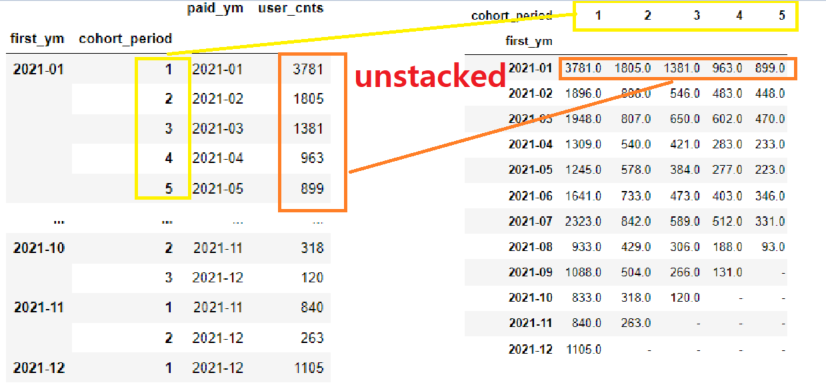

참고
-  null 값 삭제하여 명확하게 볼수도 있음 (필수는 아님) -> 단, 타입이 바뀌는지 꼭 확인하기 !!!
    - # user_cohort = df_user_cnts.set_index(['first_ym', 'cohort_period'])['user_cnts'].unstack().fillna(0)
    - # user_cohort = df_user_cnts.set_index(['first_ym', 'cohort_period'])['user_cnts'].unstack().fillna('-')
    - '-'로 채울경우, 1번째 행 제외하고,NaN이 object로 변해버림 -> 숫자 0으로 넣고 진행해야 함 !!!!!!!!!!!!!

### 3.3.5. unstack 결과를, 첫 코호트 기간의 값으로 나눠주기 → retention 산출

In [39]:
user_cohort[1]
# 파이썬은 0부터 count 하기때문에 +1 해줬기때문에 기존코드 0 -> 1로 변환됨 
##df_user_cnts['cohort_period'] = df_user_cnts.groupby(['first_ym']).cumcount()+1

first_ym
2021-01    3781.0
2021-02    1896.0
2021-03    1948.0
2021-04    1309.0
2021-05    1245.0
2021-06    1641.0
2021-07    2323.0
2021-08     933.0
2021-09    1088.0
2021-10     833.0
2021-11     840.0
2021-12    1105.0
Name: 1, dtype: float64

In [40]:
user_cohort.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 2021-01 to 2021-12
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       12 non-null     float64
 1   2       11 non-null     float64
 2   3       10 non-null     float64
 3   4       9 non-null      float64
 4   5       8 non-null      float64
 5   6       7 non-null      float64
 6   7       6 non-null      float64
 7   8       5 non-null      float64
 8   9       4 non-null      float64
 9   10      3 non-null      float64
 10  11      2 non-null      float64
 11  12      1 non-null      float64
dtypes: float64(12)
memory usage: 1.5+ KB


In [41]:
user_retention = user_cohort.divide(user_cohort[1], axis = 0)
user_retention

cohort_period,1,2,3,4,5,6,7,8,9,10,11,12
first_ym,,,,,,,,,,,,
2021-01,1.0,0.477387,0.365247,0.254695,0.237768,0.232478,0.250992,0.207353,0.199947,0.197567,0.142026,0.081195
2021-02,1.0,0.468354,0.287975,0.254747,0.236287,0.235759,0.190401,0.171941,0.161920,0.131329,0.075422,NaN
2021-03,1.0,0.414271,0.333676,0.309035,0.241273,0.198665,0.202772,0.178645,0.145791,0.077515,NaN,NaN
2021-04,1.0,0.412529,0.321620,0.216196,0.177998,0.180290,0.170359,0.130634,0.061115,NaN,NaN,NaN
2021-05,1.0,0.464257,0.308434,0.222490,0.179116,0.167068,0.116466,0.067470,NaN,NaN,NaN,NaN
2021-06,1.0,0.446679,0.288239,0.245582,0.210847,0.126752,0.071907,NaN,NaN,NaN,NaN,NaN
2021-07,1.0,0.362462,0.253551,0.220405,0.142488,0.075334,NaN,NaN,NaN,NaN,NaN,NaN
2021-08,1.0,0.459807,0.327974,0.201501,0.099678,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09,1.0,0.463235,0.244485,0.120404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 04. 시각화 with 히트맵

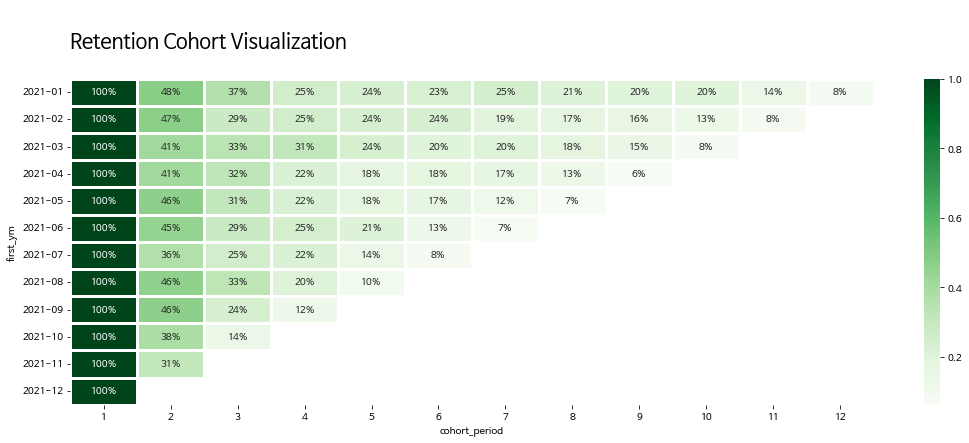

In [42]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (18, 6))

sns.heatmap(
    data = user_retention,
    annot = True,# 숫자 표시여부
    fmt = '.0%', #소수점 자리 0
    linecolor = 'white',
    linewidth = 3,
    # cmap = 'Spectral' # 다채로운 색상
    cmap = 'Greens' #컬러맵, 색상
)
plt.title(f'\nRetention Cohort Visualization\n', fontsize = 20, loc = 'left')
plt.show()

### 위의 3.3번의 해당하는 과정을 한 번에 실행하는 코드 

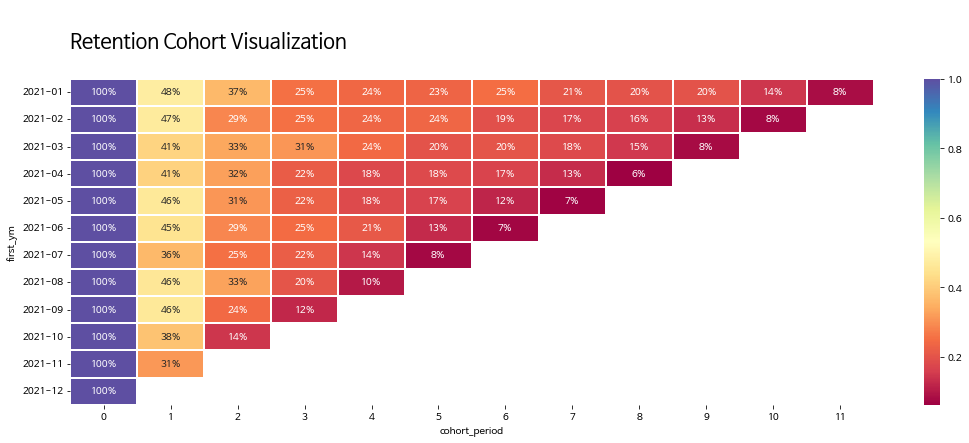

In [43]:

# temp_df = df_base[df_base['branch'] == temp_branch]
df_user_cnts = df_base.groupby(['first_ym', 'paid_ym'])['user_key'].agg('nunique').reset_index().rename(columns = {'user_key':'user_cnts'})
df_user_cnts['cohort_period'] = df_user_cnts.groupby(['first_ym']).cumcount()

user_cohort = df_user_cnts.set_index(['first_ym', 'cohort_period'])['user_cnts'].unstack()
user_retention = user_cohort.divide(user_cohort[0], axis = 0)

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (18, 6))

sns.heatmap(
    data = user_retention,
    annot = True,
    fmt = '.0%',
    linecolor = 'white',
    linewidth = 0.1,
    cmap = 'Spectral'
)
plt.title(f'\nRetention Cohort Visualization\n', fontsize = 20, loc = 'left')
plt.show()

### 7호 & 8호 & 9호점에 대해 별도 cohort 구하고 싶을 경우

In [44]:
#전 지점 개수
len((df_base.branch.unique()))

42

In [45]:
df_base.head(2)

,user_key,branch,sales_type,items,paid_date,item_seg,first_paid,first_ym,paid_ym
0,1,01호,매출,자유석,2021-04-11,자유,2021-04-11,2021-04,2021-04
1,2,01호,매출,싱글석,2021-03-28,고정,2021-03-28,2021-03,2021-03


In [46]:
selected_branches = ['07호', '08호', '09호']

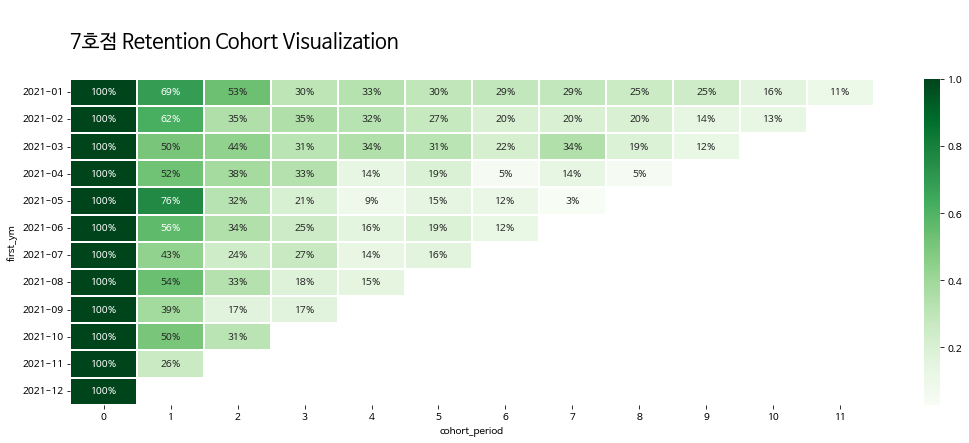

In [47]:
# 7호점 코호트 분석

temp_df = df_base[df_base['branch'] == '07호']
df_user_cnts = temp_df.groupby(['first_ym', 'paid_ym'])['user_key'].agg('nunique').reset_index().rename(columns = {'user_key':'user_cnts'})
df_user_cnts['cohort_period'] = df_user_cnts.groupby(['first_ym']).cumcount()
user_cohort = df_user_cnts.set_index(['first_ym', 'cohort_period'])['user_cnts'].unstack()
user_retention = user_cohort.divide(user_cohort[0], axis = 0)

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (18, 6))

sns.heatmap(
    data = user_retention,
    annot = True,
    fmt = '.0%',
    linecolor = 'white',
    linewidth = 0.1,
    cmap = 'Greens'
    )
plt.title(f'\n7호점 Retention Cohort Visualization\n', fontsize = 20, loc = 'left')
plt.show()
print('\n\n\n') # 그래프간 띄어쓰기

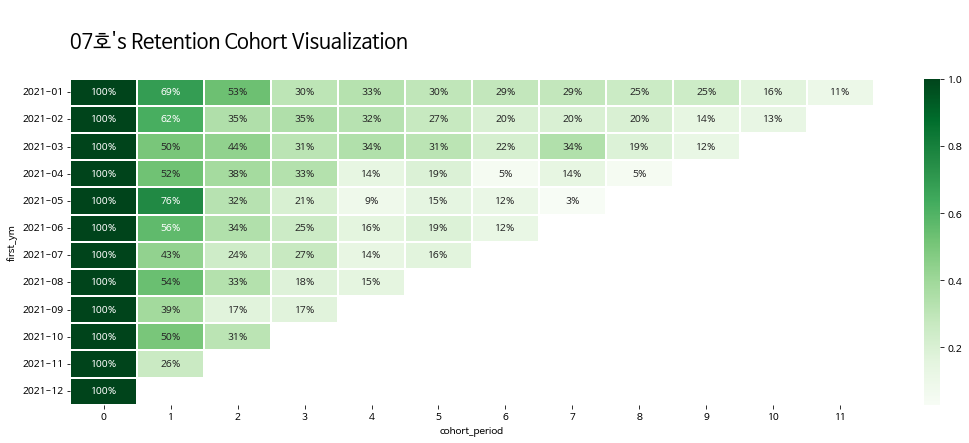

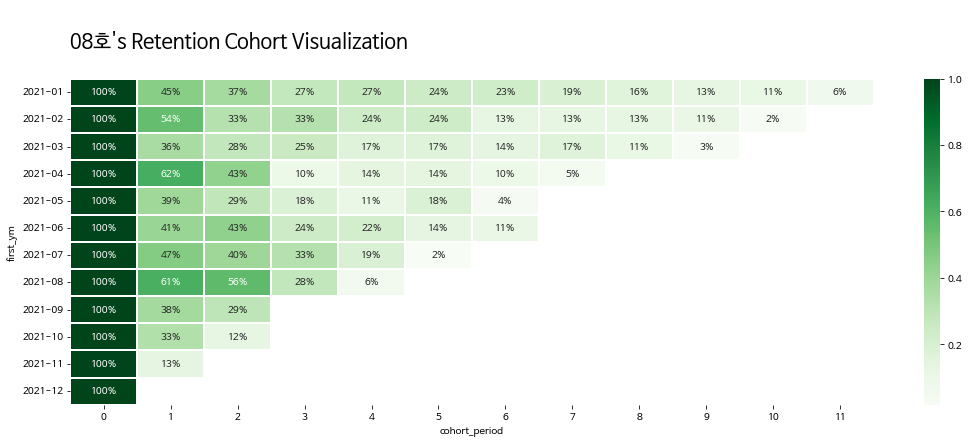

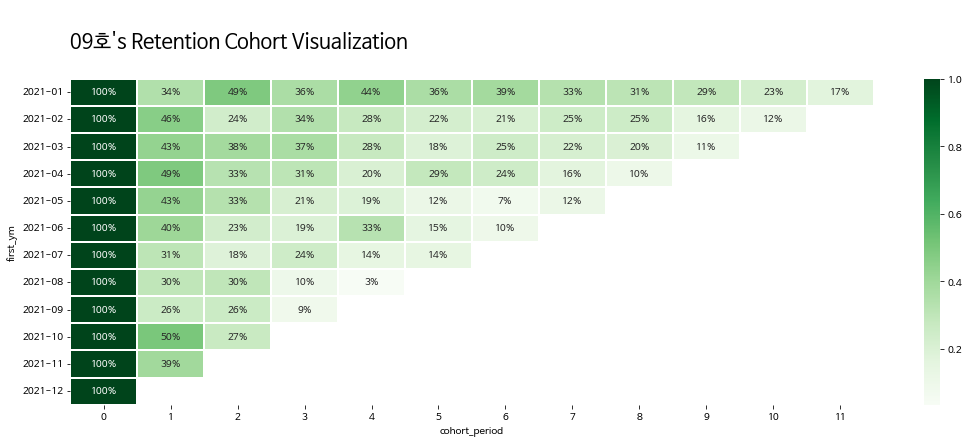

In [48]:
# 7,8,9 호점 동시에 코호트 분석


for temp_branch in selected_branches:

    temp_df = df_base[df_base['branch'] == temp_branch]
    df_user_cnts = temp_df.groupby(['first_ym', 'paid_ym'])['user_key'].agg('nunique').reset_index().rename(columns = {'user_key':'user_cnts'})
    df_user_cnts['cohort_period'] = df_user_cnts.groupby(['first_ym']).cumcount()

    user_cohort = df_user_cnts.set_index(['first_ym', 'cohort_period'])['user_cnts'].unstack()
    user_retention = user_cohort.divide(user_cohort[0], axis = 0)

    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (18, 6))

    sns.heatmap(
        data = user_retention,
        annot = True,
        fmt = '.0%',
        linecolor = 'white',
        linewidth = 0.1,
        cmap = 'Greens'
    )
    plt.title(f'\n{temp_branch}\'s Retention Cohort Visualization\n', fontsize = 20, loc = 'left')
    plt.show()
    print('\n\n\n') # 그래프간 간격 

# 번외
## 빠진 이 채우기(21/4, 5, 9월): 08호점

In [49]:
df_8 = df_base[df_base['branch'] == '08호']
df_8

,user_key,branch,sales_type,items,paid_date,item_seg,first_paid,first_ym,paid_ym
11261,2867,08호,매출,포커스석,2021-01-25,자유,2021-01-25,2021-01,2021-01
11262,2867,08호,매출,포커스석,2021-03-04,자유,2021-01-25,2021-01,2021-03
11263,2868,08호,매출,메가석,2021-03-01,자유,2021-03-01,2021-03,2021-03
11264,2868,08호,매출,메가석,2021-03-30,자유,2021-03-01,2021-03,2021-03
11266,2869,08호,매출,포커스석,2021-10-25,자유,2021-10-25,2021-10,2021-10
...,...,...,...,...,...,...,...,...,...
12606,3255,08호,매출,포커스석,2021-02-08,자유,2021-02-08,2021-02,2021-02
12607,3256,08호,매출,자유석,2021-06-27,자유,2021-06-27,2021-06,2021-06
12608,3256,08호,매출,포커스석,2021-06-28,자유,2021-06-27,2021-06,2021-06
12610,3256,08호,매출,포커스석,2021-07-25,자유,2021-06-27,2021-06,2021-07


In [50]:
df_8_user = df_8.groupby(['first_ym', 'paid_ym'])['user_key'].agg('nunique').reset_index().rename(columns = {'user_key':'user_cnts'})
df_8_user

,first_ym,paid_ym,user_cnts
0,2021-01,2021-01,62
1,2021-01,2021-02,28
2,2021-01,2021-03,23
3,2021-01,2021-04,17
4,2021-01,2021-05,17
...,...,...,...
70,2021-10,2021-11,8
71,2021-10,2021-12,3
72,2021-11,2021-11,15
73,2021-11,2021-12,2


In [51]:
df_8_user['first_ym'].value_counts()

2021-01    12
2021-02    11
2021-03    10
2021-04     8
2021-05     7
2021-06     7
2021-07     6
2021-08     5
2021-09     3
2021-10     3
2021-11     2
2021-12     1
Name: first_ym, dtype: int64

- first_ym 2021-04: 9개 있어야 하지만 8개 있음
- first_ym 2021-05: 8개 있어야 하지만 7개 있음
- first_ym 2021-09: 4개 있어야 하지만 3개 있음

In [52]:
df_8_user[df_8_user['first_ym'] == '2021-04']

,first_ym,paid_ym,user_cnts
33,2021-04,2021-04,21
34,2021-04,2021-05,13
35,2021-04,2021-06,9
36,2021-04,2021-07,2
37,2021-04,2021-08,3
38,2021-04,2021-09,3
39,2021-04,2021-10,2
40,2021-04,2021-11,1


In [53]:
# ↑ 저곳의 data frame에, paid_ym 2021-12가 빠져있음

In [54]:
df_8_user[df_8_user['first_ym'] == '2021-05']

,first_ym,paid_ym,user_cnts
41,2021-05,2021-05,28
42,2021-05,2021-06,11
43,2021-05,2021-07,8
44,2021-05,2021-08,5
45,2021-05,2021-09,3
46,2021-05,2021-10,5
47,2021-05,2021-11,1


In [55]:
# ↑ 저곳의 data frame에, paid_ym 2021-12가 빠져있음

In [56]:
df_8_user[df_8_user['first_ym'] == '2021-09']

,first_ym,paid_ym,user_cnts
66,2021-09,2021-09,24
67,2021-09,2021-10,9
68,2021-09,2021-11,7


In [57]:
# ↑ 저곳의 data frame에, paid_ym 2021-12가 빠져있음

In [58]:
# 채우기 전 data frame
df_8_user

,first_ym,paid_ym,user_cnts
0,2021-01,2021-01,62
1,2021-01,2021-02,28
2,2021-01,2021-03,23
3,2021-01,2021-04,17
4,2021-01,2021-05,17
...,...,...,...
70,2021-10,2021-11,8
71,2021-10,2021-12,3
72,2021-11,2021-11,15
73,2021-11,2021-12,2


### 즉,  first_ym 2021-04 // 2021-05 // 2021-09에 각각 paid_ym 2021-12가 빠져있음 -> 12월에 매출이 0 임

In [59]:
df_8_user.loc[-1] = ['2021-04', '2021-12', 0]
df_8_user.loc[-2] = ['2021-05', '2021-12', 0]
df_8_user.loc[-3] = ['2021-09', '2021-12', 0]

# loc[인덱스번호] = location
# 숫자는 현재 없는 인덱스로, 임의로 지정한 것

In [60]:
df_8_user

,first_ym,paid_ym,user_cnts
0,2021-01,2021-01,62
1,2021-01,2021-02,28
2,2021-01,2021-03,23
3,2021-01,2021-04,17
4,2021-01,2021-05,17
...,...,...,...
73,2021-11,2021-12,2
74,2021-12,2021-12,21
-1,2021-04,2021-12,0
-2,2021-05,2021-12,0


In [61]:
df_8_user = df_8_user.sort_values(by = ['first_ym', 'paid_ym'], ascending = True, ignore_index = True)
df_8_user
#ascending = True (오름차순), ignore_index = True(index 새로 만들기)

,first_ym,paid_ym,user_cnts
0,2021-01,2021-01,62
1,2021-01,2021-02,28
2,2021-01,2021-03,23
3,2021-01,2021-04,17
4,2021-01,2021-05,17
...,...,...,...
73,2021-10,2021-11,8
74,2021-10,2021-12,3
75,2021-11,2021-11,15
76,2021-11,2021-12,2


## [완성]

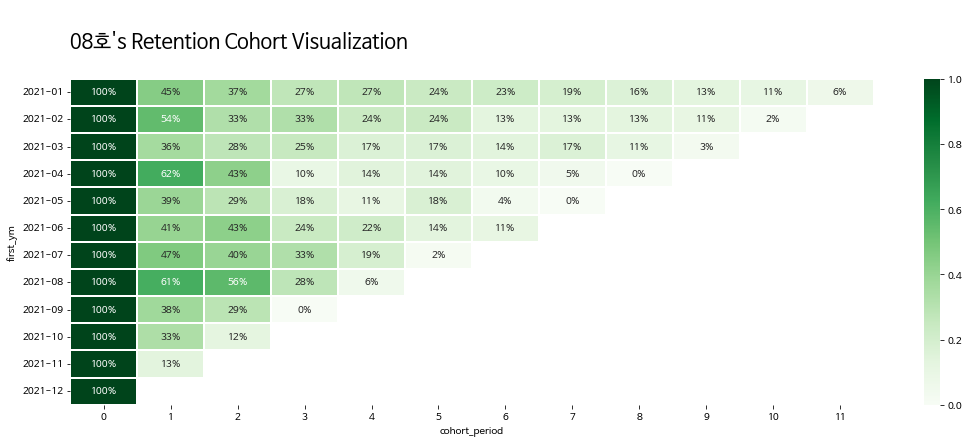

In [62]:
# 빠진 이 끼워맞춘 것 확인

# temp_df = df_base[df_base['branch'] == temp_branch]
df_user_cnts = df_8_user#temp_df.groupby(['first_ym', 'paid_ym'])['user_key'].agg('nunique').reset_index().rename(columns = {'user_key':'user_cnts'})
df_user_cnts['cohort_period'] = df_user_cnts.groupby(['first_ym']).cumcount()

user_cohort = df_user_cnts.set_index(['first_ym', 'cohort_period'])['user_cnts'].unstack()
user_retention = user_cohort.divide(user_cohort[0], axis = 0)

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (18, 6))

sns.heatmap(
    data = user_retention,
    annot = True,
    fmt = '.0%',
    linecolor = 'white',
    linewidth = 0.1,
    cmap = 'Greens'
)
plt.title(f'\n08호\'s Retention Cohort Visualization\n', fontsize = 20, loc = 'left')
plt.show()
print('\n\n\n')

### 좌석 타입에 따라 확인
- 다만, 좌석수가 많지 않기때문에(빠진 데이터가 많음) 의미있는 코호트 분석이라 이야기하기 어려움

In [64]:
df_base.head()

,user_key,branch,sales_type,items,paid_date,item_seg,first_paid,first_ym,paid_ym
0,1,01호,매출,자유석,2021-04-11,자유,2021-04-11,2021-04,2021-04
1,2,01호,매출,싱글석,2021-03-28,고정,2021-03-28,2021-03,2021-03
2,2,01호,매출,싱글석,2021-06-27,고정,2021-03-28,2021-03,2021-06
3,2,01호,매출,싱글석,2021-08-31,고정,2021-03-28,2021-03,2021-08
4,2,01호,매출,싱글석,2021-09-30,고정,2021-03-28,2021-03,2021-09


In [65]:
df_base['item_seg'].unique().tolist()

['자유', '고정', '단기']

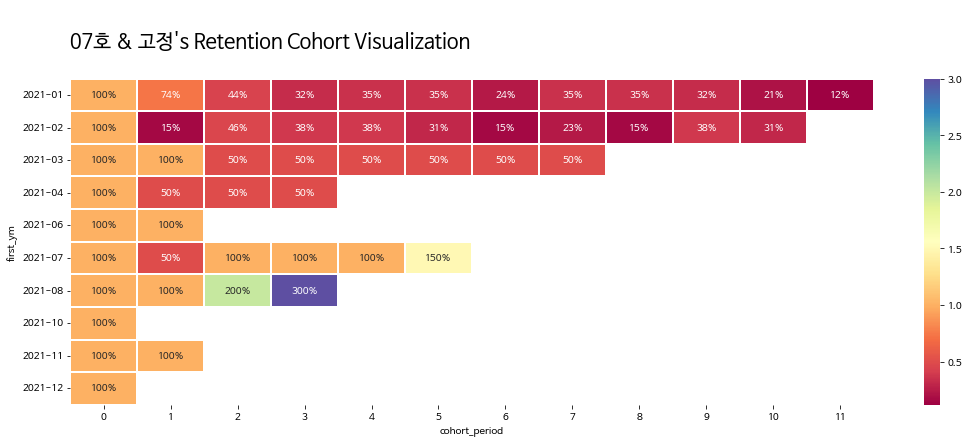

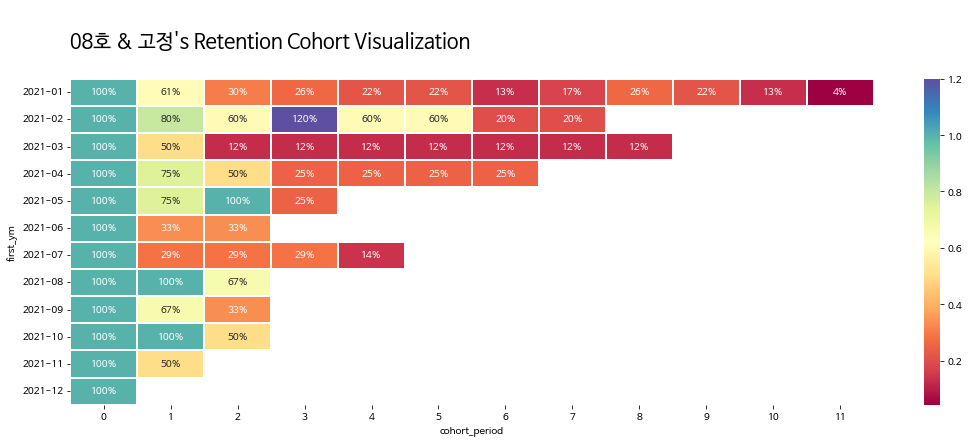

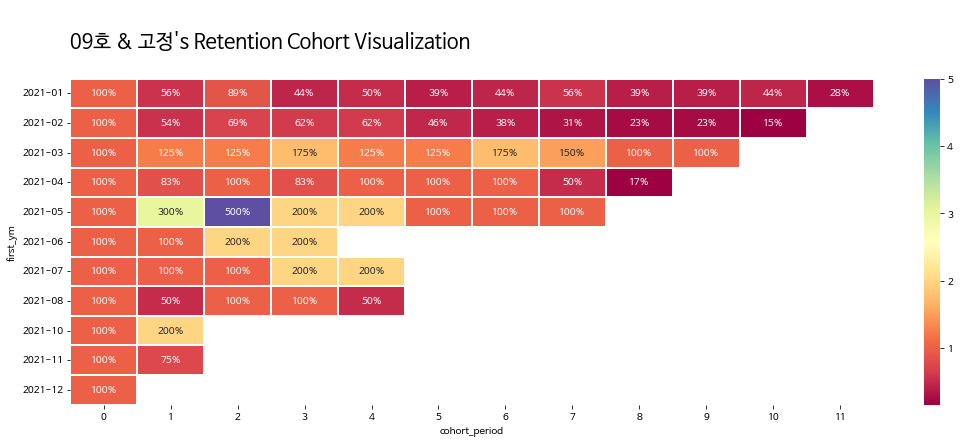

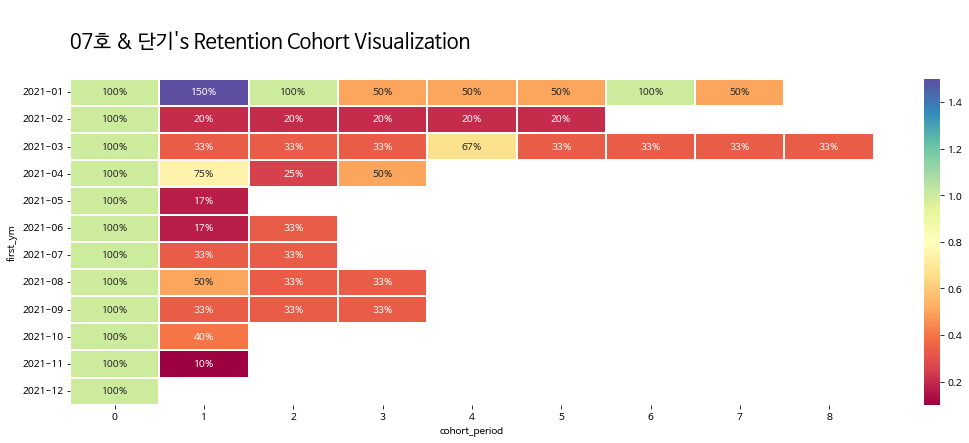

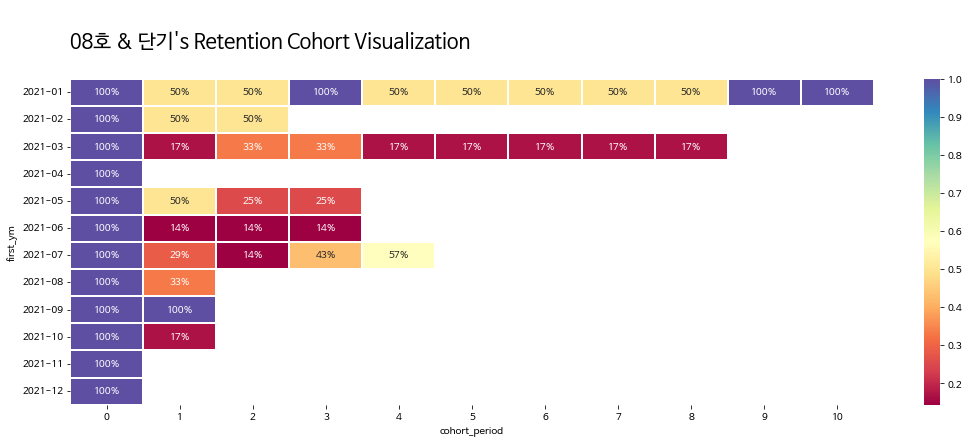

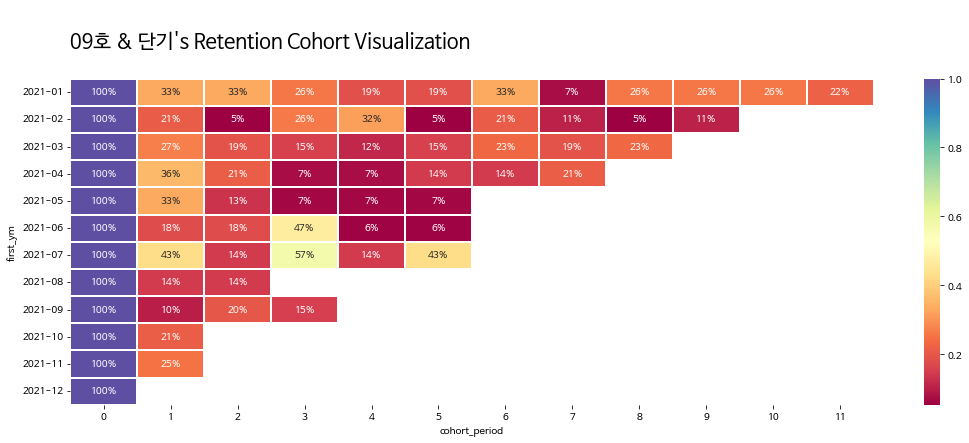

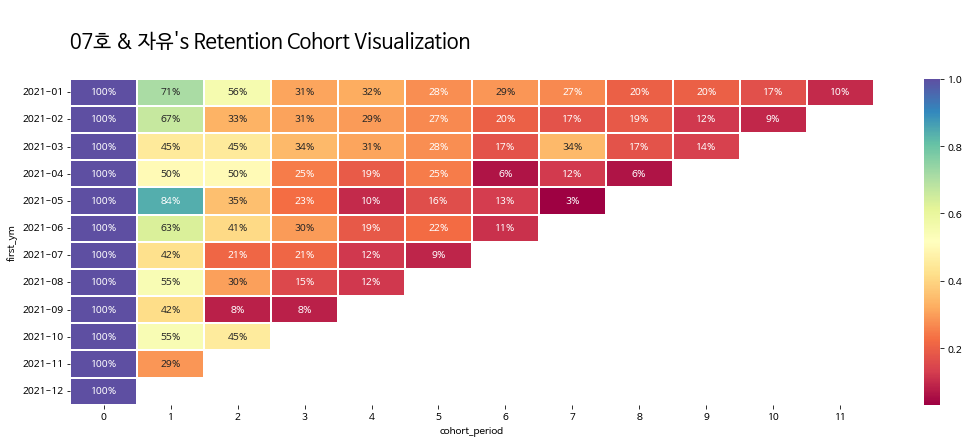

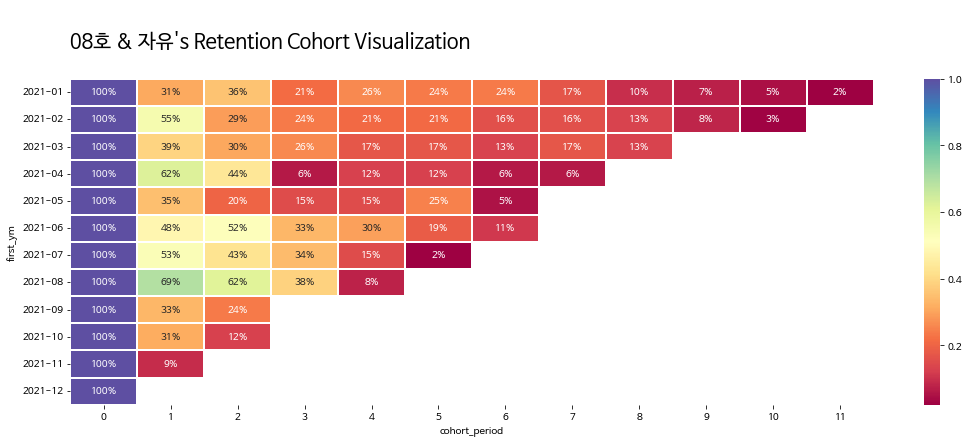

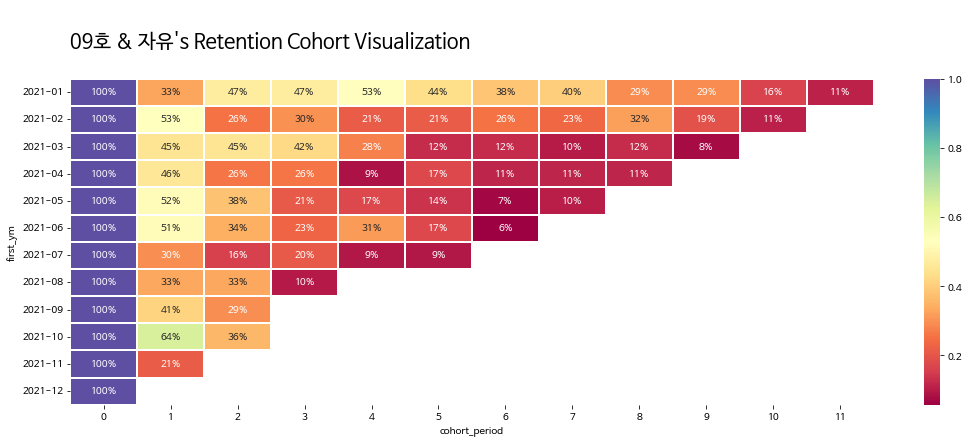

In [66]:
for temp_item in sorted(df_base['item_seg'].unique().tolist()):
    for temp_branch in selected_branches:

        temp_df = df_base[(df_base['item_seg'] == temp_item) & (df_base['branch'] == temp_branch)]
        df_user_cnts = temp_df.groupby(['first_ym', 'paid_ym'])['user_key'].agg('nunique').reset_index().rename(columns = {'user_key':'user_cnts'})
        df_user_cnts['cohort_period'] = df_user_cnts.groupby(['first_ym']).cumcount()

        user_cohort = df_user_cnts.set_index(['first_ym', 'cohort_period'])['user_cnts'].unstack()
        user_retention = user_cohort.divide(user_cohort[0], axis = 0)

        fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (18, 6))

        sns.heatmap(
            data = user_retention,
            annot = True,
            fmt = '.0%',
            linecolor = 'white',
            linewidth = 0.1,
            cmap = 'Spectral'
        )
        plt.title(f'\n{temp_branch} & {temp_item}\'s Retention Cohort Visualization\n', fontsize = 20, loc = 'left')
        plt.show()
        print('\n\n\n')